In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [2]:
df= pd.read_csv("../../data/processed/oline_merge.csv")
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

In [3]:
df.columns

Index(['age', 'draft_pos', 'attempts', 'yards_run', 'tds_run', 'longgain_run',
       'yardsperatt', 'yardspergame_run', 'Percenthit (%)', 'g', 'gs', 'tgt',
       'rec', 'yards_rec', 'yardsperrec', 'tds_rec', 'firstdowns',
       'longgain_rec', 'yardspertarget', 'recpergame', 'yardspergame_rec',
       'fumbles', 'team_adjusted_line_yards', 'team_running_back_yards',
       'team_stuffed_rate'],
      dtype='object')

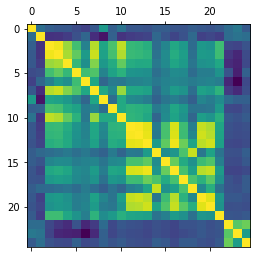

In [4]:
plt.matshow(df.corr())

In [5]:
df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)


In [6]:
len(df.columns)

19

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [8]:
df

,age,draft_pos,attempts,yards_run,tds_run,longgain_run,Percenthit (%),g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,26,182,75,389,5,75,1.100909,9,9,45,33,261,2,12,30,2,5,3,1
1,25,182,236,1084,16,56,0.369547,16,16,68,49,474,3,18,67,3,5,13,6
2,24,182,133,728,8,67,0.293098,12,8,35,26,206,1,12,24,1,7,6,12
3,23,7,81,448,4,46,0.308675,12,4,18,9,22,0,2,9,0,5,13,2
4,35,7,80,314,2,27,0.529768,11,8,16,11,78,0,3,18,0,19,22,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,22,153,77,312,1,19,0.329198,13,3,13,6,55,0,1,18,1,13,13,12
584,32,23,138,377,2,16,0.398135,12,6,11,8,20,0,0,9,1,18,29,18
585,24,160,31,89,1,18,0.408291,8,0,12,9,65,0,4,16,0,26,15,26
586,23,160,76,293,1,16,0.405357,13,5,23,18,152,0,9,17,2,18,17,29


In [9]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
# esv = []
# # while True: 
# for i in range(5):
    
#     X_train.shape
#     model = Sequential()

#     model.add(Dense(18, activation="relu"))
#     model.add(Dense(random.randint(5,6), activation="relu"))
#     model.add(Dense(random.randint(5,6), activation="relu"))
#     model.add(Dense(random.randint(5,6), activation="relu"))
    

#     model.add(Dense(1))

#     model.compile(optimizer="adam", loss="mse")
#     model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=65)
    
#     predictions = model.predict(X_test)
#     esv.append(explained_variance_score(y_test,predictions))
#     print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
#     if(explained_variance_score(y_test,predictions) > .625):
#         winsound.Beep(1047, 750)
#         winsound.Beep(1047, 750)
#         break
# #     winsound.Beep(1397,250)

# esv.sort(reverse=True)
# print("\n")
# print("MAX: " + str(max(esv)))
# print("\n")
# print(esv)
# winsound.Beep(784, 750)

In [11]:
#model.save('./savedmodels/April6-63dnn')

In [12]:
loaded_model = tf.keras.models.load_model('./savedmodels/April13-65dnn')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  1.27029617255551
RMSE:  1.1270741646207272
MAE:  0.7869059068951773
ESV:  0.6320856007472058


In [13]:
df.columns

Index(['age', 'draft_pos', 'attempts', 'yards_run', 'tds_run', 'longgain_run',
       'Percenthit (%)', 'g', 'gs', 'tgt', 'rec', 'yards_rec', 'tds_rec',
       'firstdowns', 'longgain_rec', 'fumbles', 'team_adjusted_line_yards',
       'team_running_back_yards', 'team_stuffed_rate'],
      dtype='object')

In [14]:
Aaron_Jones2020 = np.array([26,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1])
Aaron_Jones2020.shape
X_transformed = scaler.fit_transform(Aaron_Jones2020[:, np.newaxis])
print(X_transformed)
print(loaded_model.predict(X_transformed.T))

[[2.26654578e-02]
 [1.64097915e-01]
 [1.81323663e-01]
 [1.00000000e+00]
 [7.25294651e-03]
 [6.89029918e-02]
 [1.17860381e-02]
 [1.17860381e-02]
 [5.62103354e-02]
 [4.17044424e-02]
 [3.20942883e-01]
 [9.06618314e-04]
 [1.26926564e-02]
 [2.62919311e-02]
 [9.06618314e-04]
 [3.62647325e-03]
 [1.81323663e-03]
 [0.00000000e+00]]
[[0.61635125]]


In [15]:
Aaron_Jones2020 = np.array([26,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1])
Aaron_Jones2020.shape
X_transformed = scaler.transform(Aaron_Jones2020.reshape(1, -1))
print(X_transformed, '\n')
print(loaded_model.predict(X_transformed))

[[2.26654578e-02 1.64097915e-01 1.81323663e-01 1.00000000e+00
  7.25294651e-03 6.89029918e-02 1.17860381e-02 1.17860381e-02
  5.62103354e-02 4.17044424e-02 3.20942883e-01 9.06618314e-04
  1.26926564e-02 2.62919311e-02 9.06618314e-04 3.62647325e-03
  1.81323663e-03 0.00000000e+00]] 

[[0.61635125]]


In [16]:
#https://stackoverflow.com/questions/46555820/sklearn-standardscaler-returns-all-zeros

In [ ]:
KenyanDrake_2020 = np.array([27,73,239,955,10,69,15,13,31,25,137,0,5,18,3,30,19,25])
KenyanDrake_2020.shape
X_transformed = scaler.transform(KenyanDrake_2020.reshape(1, -1))
print(X_transformed, '\n')
print(loaded_model.predict(X_transformed))

In [18]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
real_y = rbs['2021capperc'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)
rbs= rbs.drop('2021capperc',axis=1)

real_compare= pd.DataFrame([],columns=['name', 'predicted','real'])
realpreds = []

for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    predi = loaded_model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1)))
    realpreds.append(predi[0][0])
    print(predi[0][0])
    print(real_y[i])
    listi = [['',0,0]]
    listi[0][0] = names[i]
    listi[0][1] = predi[0][0]
    listi[0][2] = real_y[i].round(decimals=3)
    listi = np.array(listi)
    print(listi)
    dfi = pd.DataFrame(listi,columns=['name', 'predicted','real'])
    real_compare = real_compare.append(dfi)
    
    print()

real_compare

Aaron Jones
[  27  182  201 1104    9   77   14   14   63   47  355    2   15   30
    2    5    3    1]
0.61549973
2.369
[['Aaron Jones' '0.61549973' '2.369']]

Kenyan Drake
[ 27  73 239 955  10  69  15  13  31  25 137   0   5  18   3  30  19  25]
0.7319136
1.5919999999999999
[['Kenyan Drake' '0.7319136' '1.592']]

Gus Edwards
[ 26 257 144 723   6  36  16   6  13   9 129   0   4  34   1   8   1   5]
0.6797882
1.796
[['Gus Edwards' '0.6797882' '1.796']]

James Conner
[ 26 205 169 721   6  59  13  11  43  35 215   0  10  18   2  32  32  28]
0.7090756
0.9288
[['James Conner' '0.7090756' '0.929']]

Chris Carson
[ 27 249 141 681   5  29  12  12  46  37 287   4  14  29   1  10  15  17]
0.68914676
1.327
[['Chris Carson' '0.68914676' '1.327']]

Jamaal Williams
[ 26 134 119 505   2  25  14   3  35  31 236   1  11  29   0   5   3   1]
0.86395913
0.8625265390000001
[['Jamaal Williams' '0.86395913' '0.863']]

Phillip Lindsay
[ 27 257 118 502   1  55  11   8  14   7  28   0   1  11   0  28  12  32

,name,predicted,real
0,Aaron Jones,0.61549973,2.369
0,Kenyan Drake,0.7319136,1.592
0,Gus Edwards,0.6797882,1.796
0,James Conner,0.7090756,0.929
0,Chris Carson,0.68914676,1.327
0,Jamaal Williams,0.86395913,0.863
0,Phillip Lindsay,0.6962655,1.63


MSE:  1.27029617255551
RMSE:  1.1270741646207272
MAE:  0.7869059068951773
ESV:  0.6320856007472058


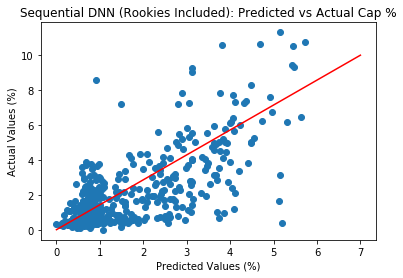

In [19]:
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))


X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)
plt.scatter(predictions,y)

plt.ylabel("Actual Values (%)")
plt.xlabel("Predicted Values (%)")
plt.title('Sequential DNN (Rookies Included): Predicted vs Actual Cap %')
plt.plot(np.linspace(0,7,100),np.linspace(0,10,100), 'r-')


In [20]:
loaded_model.summary()

Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_790 (Dense)            (None, 18)                342       
_________________________________________________________________
dense_791 (Dense)            (None, 6)                 114       
_________________________________________________________________
dense_792 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_793 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_794 (Dense)            (None, 1)                 7         
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


MAE: 1.0584441930344453
MSE: 2.329038511963138
RMSE: 1.5261187738715285
ESV:  0.40276365697830974


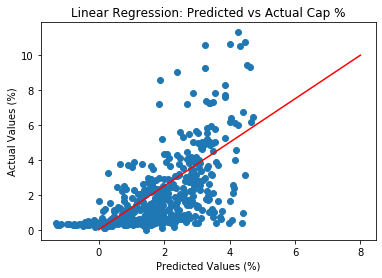

In [21]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
X_scl = scaler.fit_transform(X)
predictions = lm.predict(X_scl)
plt.scatter(predictions,y)
plt.ylabel("Actual Values (%)")
plt.xlabel("Predicted Values (%)")
plt.title("Linear Regression: Predicted vs Actual Cap %")
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print("ESV: ", explained_variance_score(y, predictions))
plt.plot(np.linspace(0,8,100),np.linspace(0,10,100), 'r-')


